<a href="https://colab.research.google.com/github/soil15/Document_classification/blob/main/Documnet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing** data

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
!touch .kaggle

In [ ]:
!ls

drive  kaggle.json  sample_data


In [ ]:
import json
token = {"username":"soil89","key":"d2a64218a716fafc304dfe8249b6dbaa"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-24 09:20:05           9882  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6073  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2251  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2501  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
!kaggle datasets download -d shaz13/real-world-documents-collections

 98% 418M/425M [00:03<00:00, 103MB/s]
100% 425M/425M [00:03<00:00, 128MB/s]


In [ ]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: docs-sm/advertisement/0000126151.jpg  
  inflating: docs-sm/advertisement/0000126164.jpg  
  inflating: docs-sm/advertisement/0000158166.jpg  
  inflating: docs-sm/advertisement/0000183192.jpg  
  inflating: docs-sm/advertisement/0000225081.jpg  
  inflating: docs-sm/advertisement/0000265083.jpg  
  inflating: docs-sm/advertisement/0000330553.jpg  
  inflating: docs-sm/advertisement/00005259.jpg  
  inflating: docs-sm/advertisement/0000549243.jpg  
  inflating: docs-sm/advertisement/0000722304.jpg  
  inflating: docs-sm/advertisement/0001489919.jpg  
  inflating: docs-sm/advertisement/0030048138.jpg  
  inflating: docs-sm/advertisement/0030049002.jpg  
  inflating: docs-sm/advertisement/0030049043.jpg  
  inflating: docs-sm/advertisement/0030049380.jpg  
  inflating: docs-sm/advertisement/0030049534.jpg  
  inflating: docs-sm/advertisement/03079140_9141.jpg  
  inflating: docs-sm/advertisement/03280862.jpg  
  inflating: d

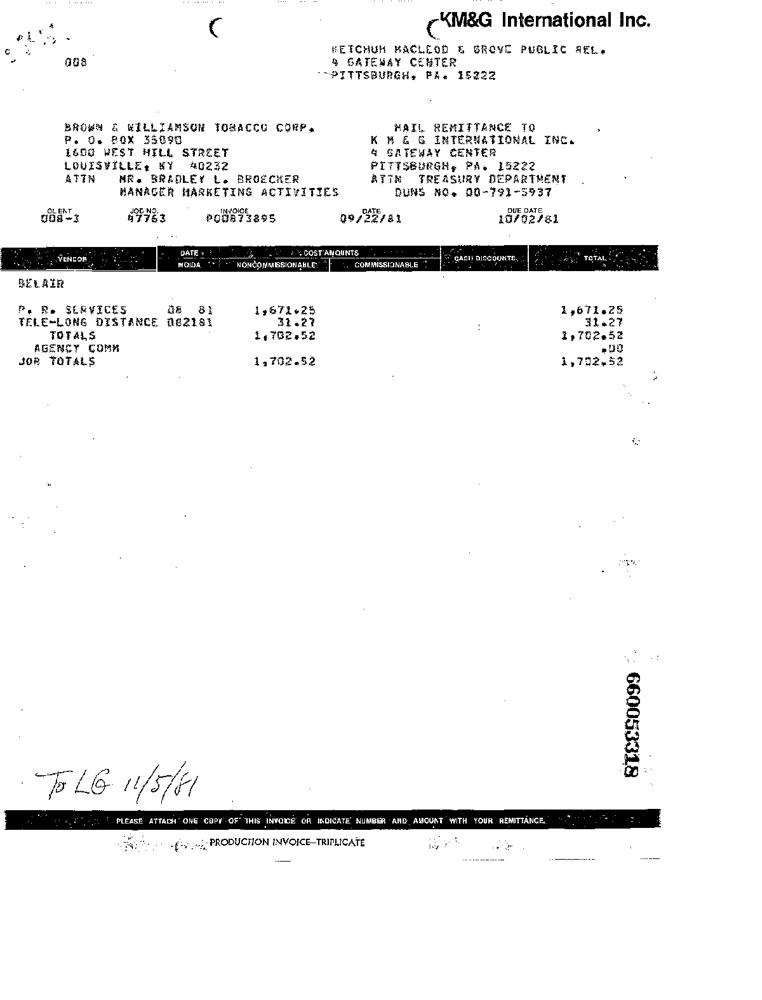

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("/content/docs-sm/invoice/0000137486.jpg")  
# plt.figure(figsize=(50, 15))
# plt.imshow(image)
image

##Note:


- We are going to use only few classes in this problem 
- Those are : ***Forms, Invoice, Letter, Questionnaire and Resume***
- So, we are deleting rest of the classes.


In [ ]:
import os
import pprint
import shutil


list_files = []

for root, dirs, files in os.walk("/content/docs-sm"):
  list_files.append([root, dirs, files])

list_files[0][1]

['resume', 'questionnaire', 'invoice', 'form', 'letter']

In [ ]:
classes = ["form", "invoice", "letter", "questionnaire", "resume"]

for dir in list_files[0][1]:
  if dir not in classes:
    shutil.rmtree("/content/docs-sm/" + str(dir), ignore_errors=False)

list_files[1]

['/content/docs-sm/resume',
 [],
 ['10393366.jpg',
  '50561221-1222.jpg',
  '03639630_9646.jpg',
  '50461057-1058.jpg',
  '50202398-2402.jpg',
  '50583444-3445.jpg',
  '2015065067.jpg',
  '2015049025.jpg',
  '50231392-1398.jpg',
  '2069604360.jpg',
  '50538017-8018.jpg',
  '50421346-1346.jpg',
  '50656098-6099.jpg',
  '50477065-7066.jpg',
  '50404927-4927.jpg',
  '50350284-0285.jpg',
  '50437567-7568.jpg',
  '50648805-8806.jpg',
  '50411107-1110.jpg',
  '50590869-0870.jpg',
  '50473054-3055.jpg',
  '2505322605_2607.jpg',
  '2025638138_2025638142.jpg',
  '2015056568_2015056584.jpg',
  '50383022-3023.jpg',
  '50459173-9174.jpg',
  '50234969-4969.jpg',
  '40038466-8467.jpg',
  '50348526-8526.jpg',
  '0000638593.jpg',
  '80412888_80412908.jpg',
  '50602367-2368.jpg',
  '50381850-1851.jpg',
  '50735851-5852.jpg',
  '50590450-0451.jpg',
  '2064279829.jpg',
  '50308888-8889.jpg',
  '50720900-0901.jpg',
  '50535944-5945.jpg',
  '50568216-8218.jpg',
  '50254577-4577.jpg',
  '2076271336_1337.jpg

# **Image pre-processing**

---



In [ ]:
list_files[0][1]

['resume', 'questionnaire', 'invoice', 'form', 'letter']

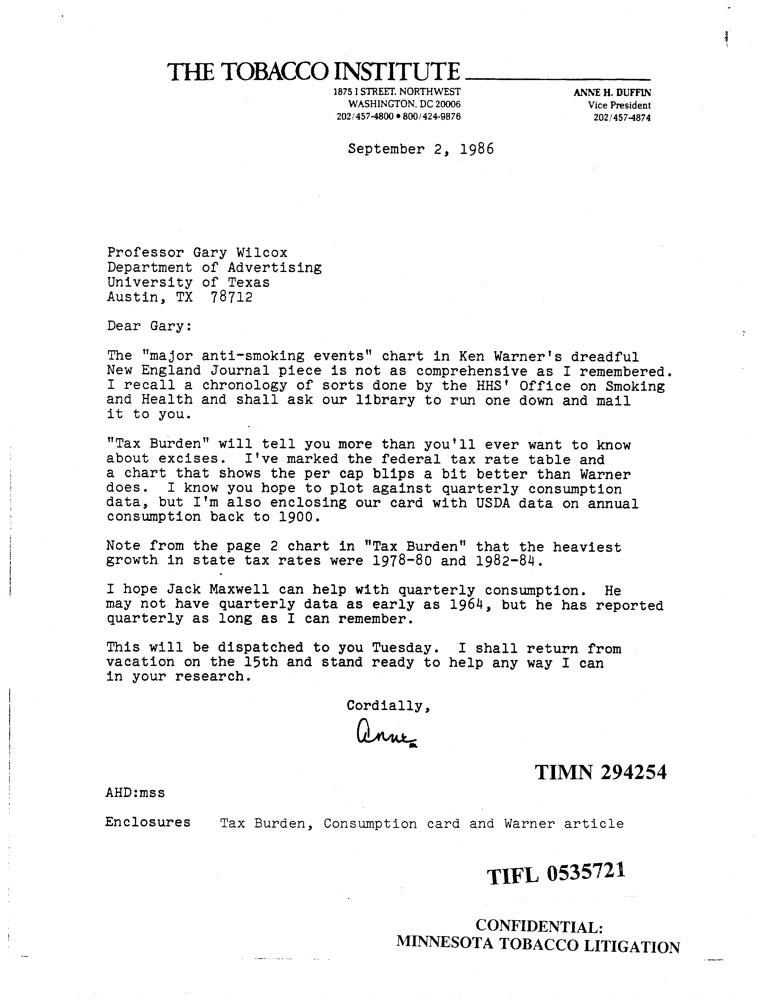

In [ ]:
folder_number = 5

image = Image.open(str(list_files[folder_number][0])+ "/" + str(list_files[folder_number][2][12]))

image

## **Traversing through each imaage file**

In [ ]:
for number in range(1, 6):
  temp = []
  for i in range(len(list_files[number][2])):
    #  path : str(list_files[number][0] + "/" + str("list_files[number][2][i]"))
    temp.append(list_files[number][2][i])

  if (list_files[number][2].sort() != temp.sort()):
    print("Logical error!!!!!!!!!!!!!!!!!!!!!!!!")
    break
else:
  print("Works!!!!!!!!!!!!!!!!!")

Works!!!!!!!!!!!!!!!!!


In [ ]:
! sudo apt install tesseract-ocr
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,568 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

50.588235294117645


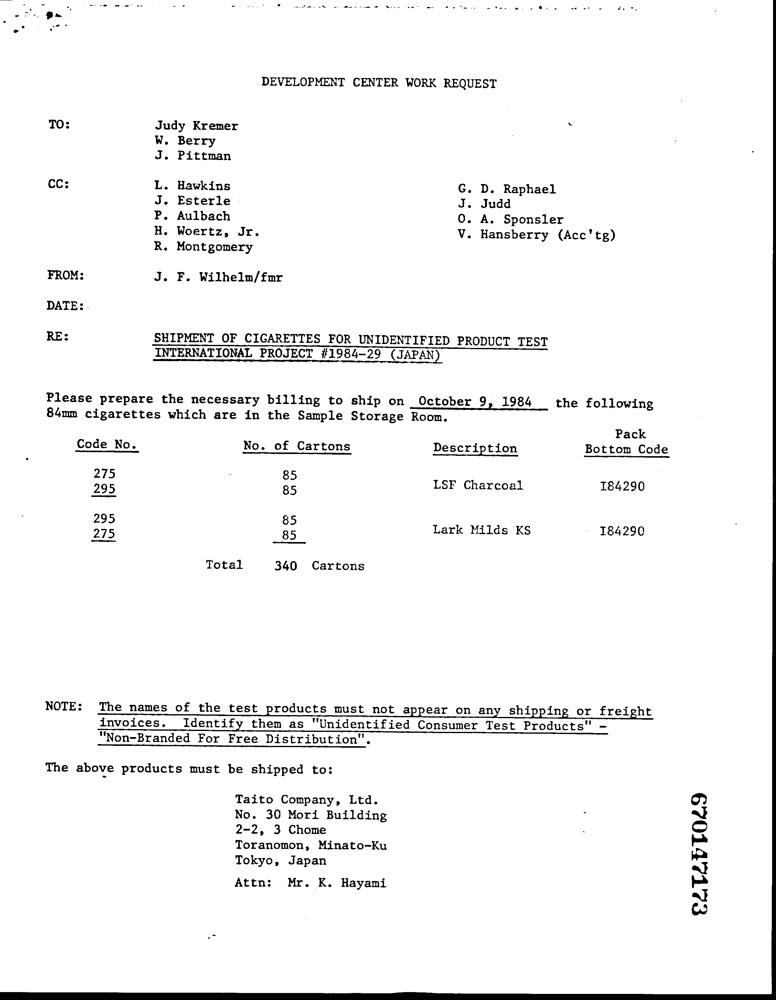

In [ ]:
import pytesseract
import numpy as np

number = 3

# path
path = str(list_files[number][0]) + "/" + str(list_files[number][2][1])

# dataframe
image_df = pytesseract.image_to_data(Image.open(path), output_type="data.frame")

pprint.pprint(len(image_df[image_df["conf"] >= 75]) * 100 / len(image_df))

Image.open(path)

## Removing empty spcaes

In [ ]:
def remove_spaces(df):
  df["text"].replace(r"^\s*$", np.nan, regex=True, inplace=True)
  df.dropna(subset=["text"], inplace=True)
  return df



# image_df["text"] = np.where(" " in image_df["text"], np.nan, image_df["text"])

# image_df["text"].replace(r"^\s*$", np.nan, regex=True, inplace=True)

# image_df.dropna(subset=["text"], inplace=True)

new_df = remove_spaces(image_df)

words = " ".join([word for word in new_df["text"]])

print("percentage: {}\n".format(len(new_df[new_df["conf"] >= 75]) * 100 / len(new_df)))


words

percentage: 75.4601226993865



'DEVELOPMENT CENTER WORK REQUEST Judy Kremer . W, Berry J. Pittman cc: L, Hawkins G. D. Raphael J. Esterle J. Judd P. Aulbach 0. A. Sponsler H. Woertz, Jr. V. Hansberry (Acc\'tg) R. Montgomery FROM: J. F. Wilheln/fmr DATE: RE: SHIPMENT OF CIGARETTES FOR UNIDENTIFIED PRODUCT TEST INTERNATIONAL PROJECT #1984-29 (JAPAN) Please prepare the necessary billing to ship on October 9, 1984 the following 84nm cigarettes which are in the Sample Storage Room. Pack Code No. No. of Cartons Description Bottom Code 275 85 ae a LSF Charcoal 184290 295 8s ae oe Lark Milds KS 184290 Total 340 Cartons NOTE: The names of the test products must not appear on any shipping or freight invoices. Identify then as “Unidentified Consumer Test Products” — "Nor \\ded For Free Distribution" ‘The above products must be shipped to: Taito Company, Ltd. No. 30 Mori Building 2-2, 3 Chome Toranomon, Minato-Ku Tokyo, Japan Attn: Mr. K. Hayami a xv S 5 p + p I eo'

## Deskewing images

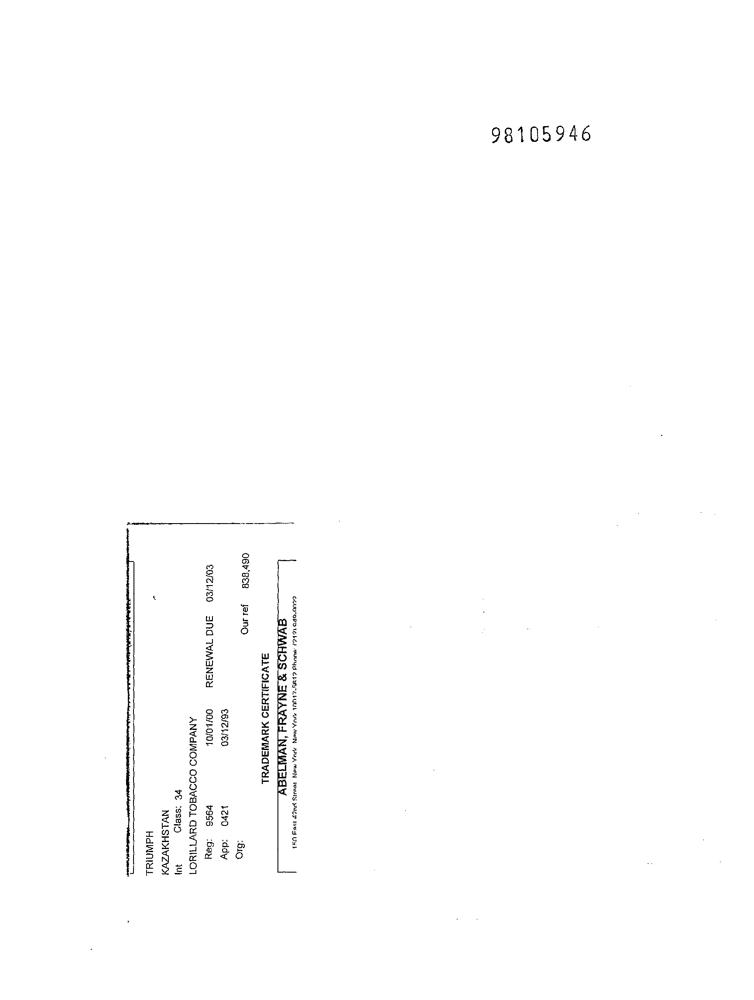

In [ ]:
ref_image = Image.open("/content/docs-sm/form/98105946.jpg")

ref_image

In [ ]:
df = pytesseract.image_to_data(ref_image, output_type="data.frame")

Image_before


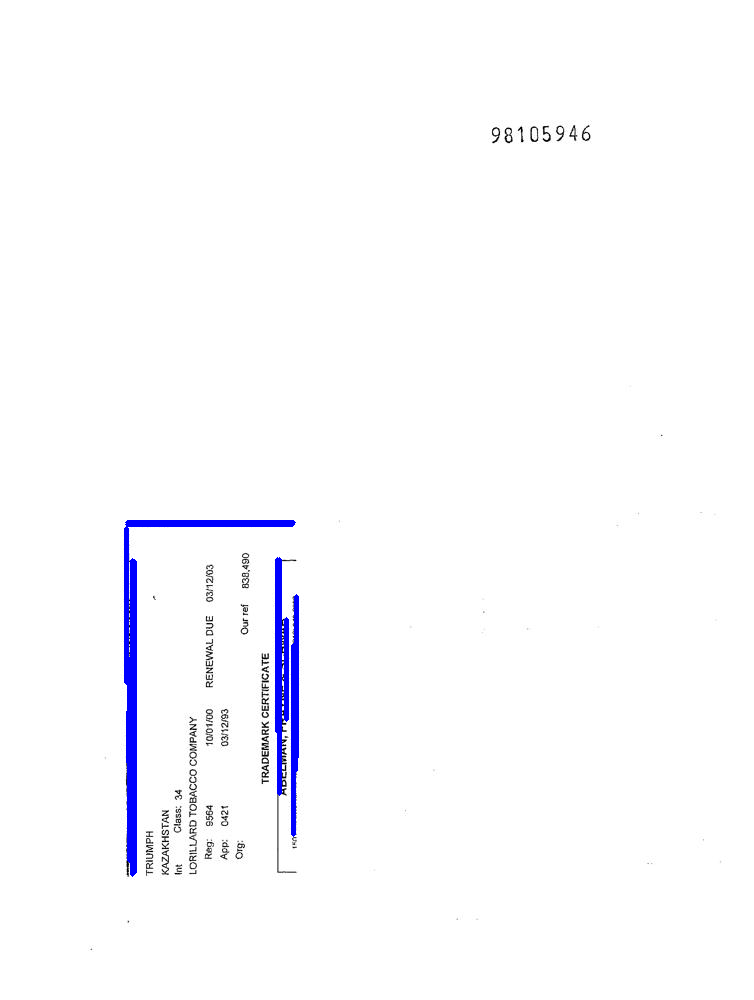

Angle is -90.0000
Image_after


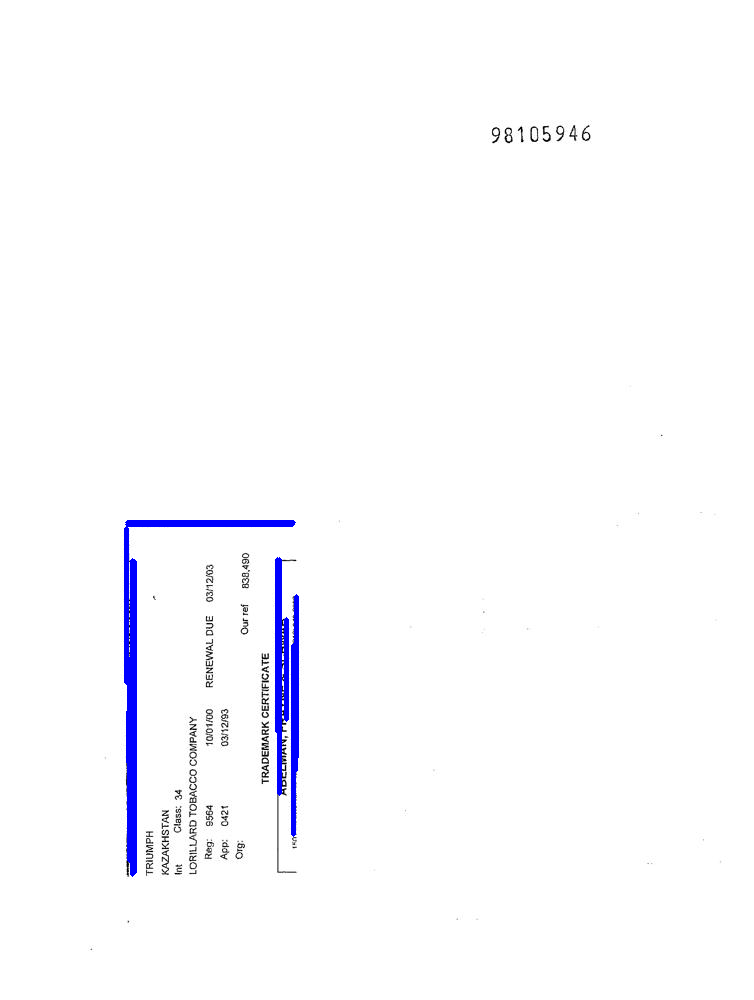

In [ ]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
from scipy import ndimage

img_before = cv2.imread('/content/docs-sm/form/98105946.jpg')

# cv2_imshow(img_before)    
# key = cv2.waitKey(0)

img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)
img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

angles = []

for [[x1, y1, x2, y2]] in lines:
    cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)

print("Image_before")
cv2_imshow(img_before)    
key = cv2.waitKey(0)

median_angle = np.median(angles)
img_rotated = ndimage.rotate(img_before, median_angle)

print(f"Angle is {median_angle:.04f}")
cv2.imwrite('/content/docs-sm/form/98105946.jpg', img_rotated)  
print("Image_after")
cv2_imshow(img_before)


## Deskewing all the images


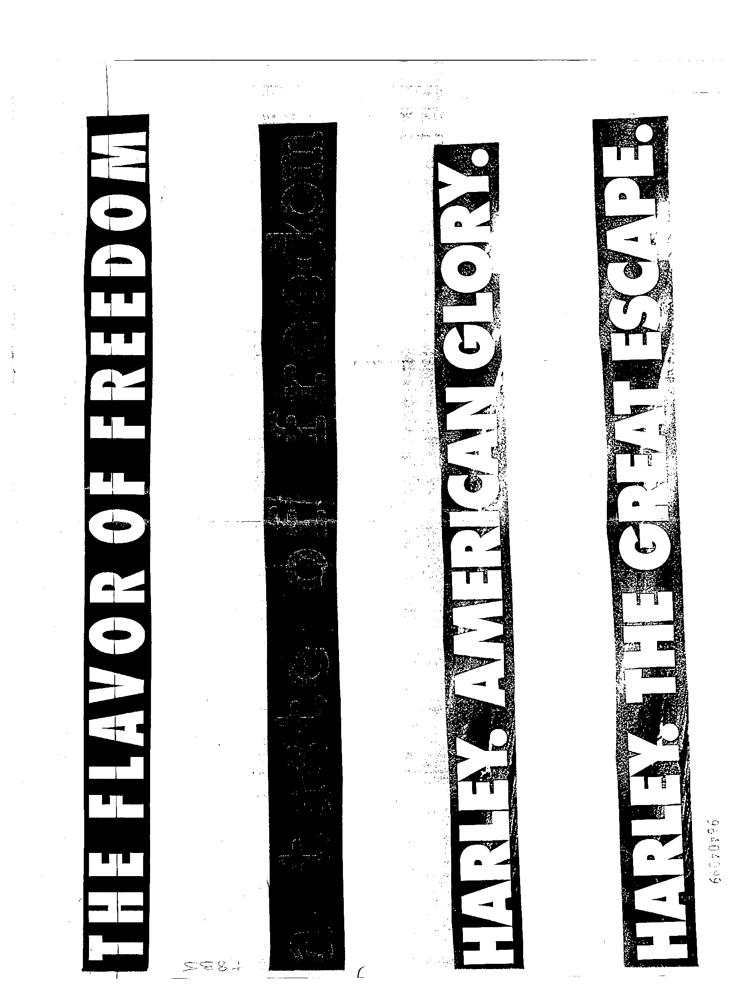

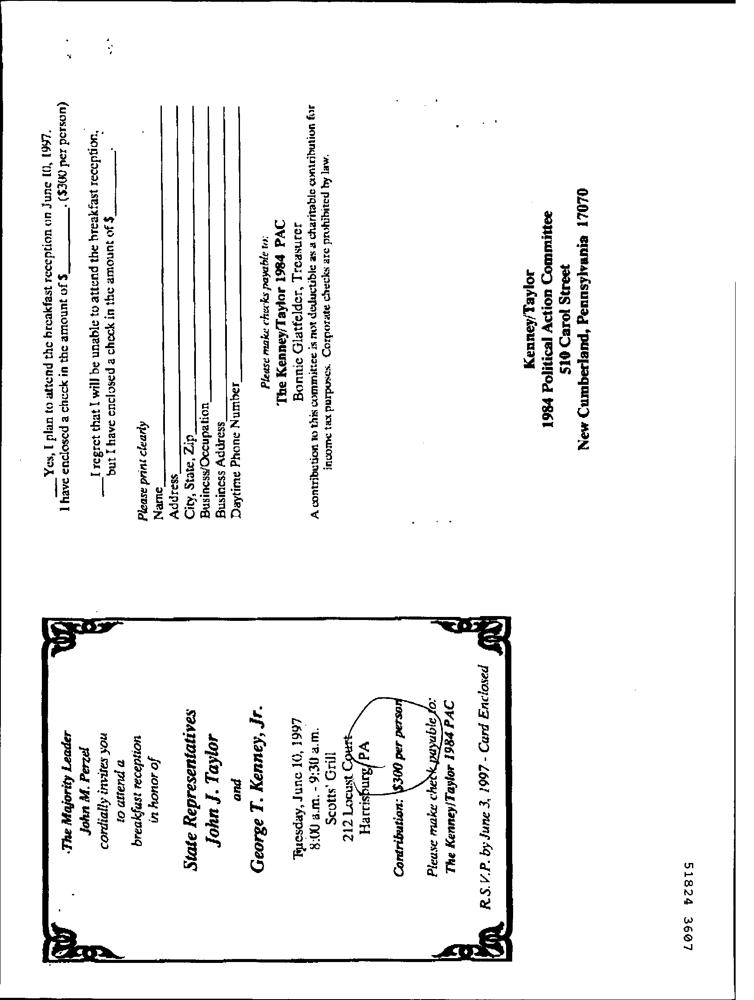

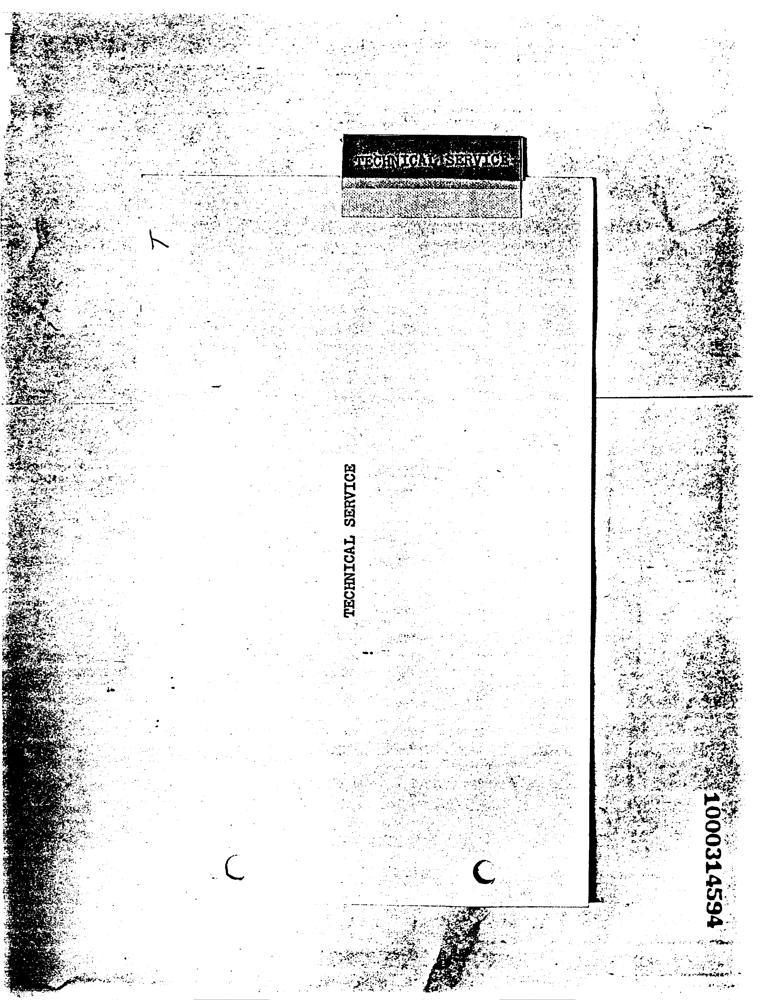

In [ ]:
tilted_images = ["/content/docs-sm/form/96404099_4104.jpg", "/content/docs-sm/form/518243607+-3609.jpg", "/content/docs-sm/form/1000314594.jpg"]

for path in tilted_images:
  cv2_imshow(cv2.imread(path))


In [ ]:
# for number in range(1, 6):
#   for i in range(len(list_files[number][2])):
#     path = str(list_files[number][0]) + "/" + str(list_files[number][2][i])

#     img_before = cv2.imread(path)

#     img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)
#     img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
#     lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

#     angles = []

#     if (lines is not None):
#       for [[x1, y1, x2, y2]] in lines:
#           cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
#           angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
#           angles.append(angle)

#       median_angle = np.median(angles)
#       if median_angle != 0:
#         img_rotated = ndimage.rotate(img_before, median_angle)

#       print("Angle: {}, folder: {}".format(median_angle, list_files[number][0]))
#       cv2.imwrite(path, img_before)  

In [ ]:
# tilted_images = ["/content/docs-sm/form/96404099_4104.jpg", "/content/docs-sm/form/518243607+-3609.jpg", "/content/docs-sm/form/1000314594.jpg"]

# for path in tilted_images:
#   cv2_imshow(cv2.imread(path))


## Analysing raw images

In [ ]:
# import random

# images = []

# for number in range(1, 6):
#   folder_img = []
#   avg_percentage = 0
#   for _ in range(int(len(list_files[number][2]) * 0.1)):

#     i = random.randint(0, len(list_files[number][2]))
#     path = str(list_files[number][0]) + "/" + str(list_files[number][2][i])
#     folder_img.append(path)
#     image_df = pytesseract.image_to_data(Image.open(path), output_type="data.frame")
    



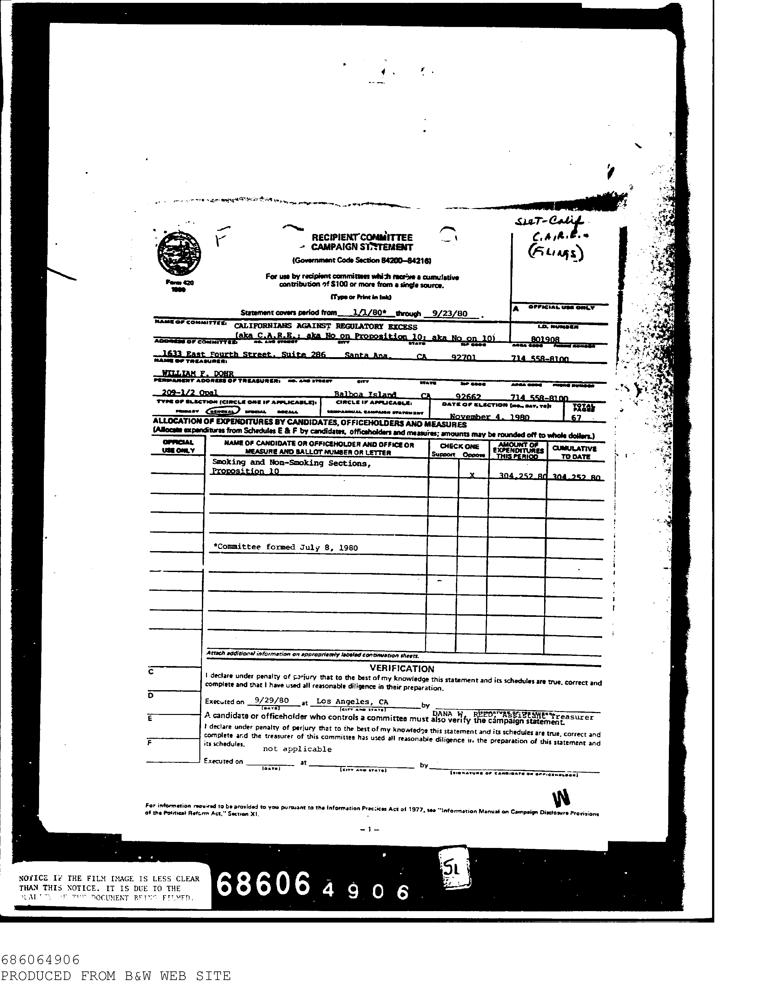

In [ ]:
image = cv2.imread("/content/docs-sm/form/896057.jpg")
cv2_imshow(image)

In [ ]:
image_df = pytesseract.image_to_data(image, output_type="data.frame")
temp = remove_spaces(image_df)
print("accuracy : {}".format(temp["conf"].sum() / len(temp)))
temp.head()

accuracy : 24.25


level  page_num  block_num  par_num  ...  width  height  conf              text
8       5         1          2        1  ...    145      16     0  Recmenrcomirrree
10      5         1          2        1  ...      5       3     0                 -
11      5         1          2        1  ...     47       7     0           Ekiaicn
12      5         1          2        1  ...     53       9     0          SPreonen
16      5         1          3        1  ...     43       7    34             (omit

[5 rows x 12 columns]

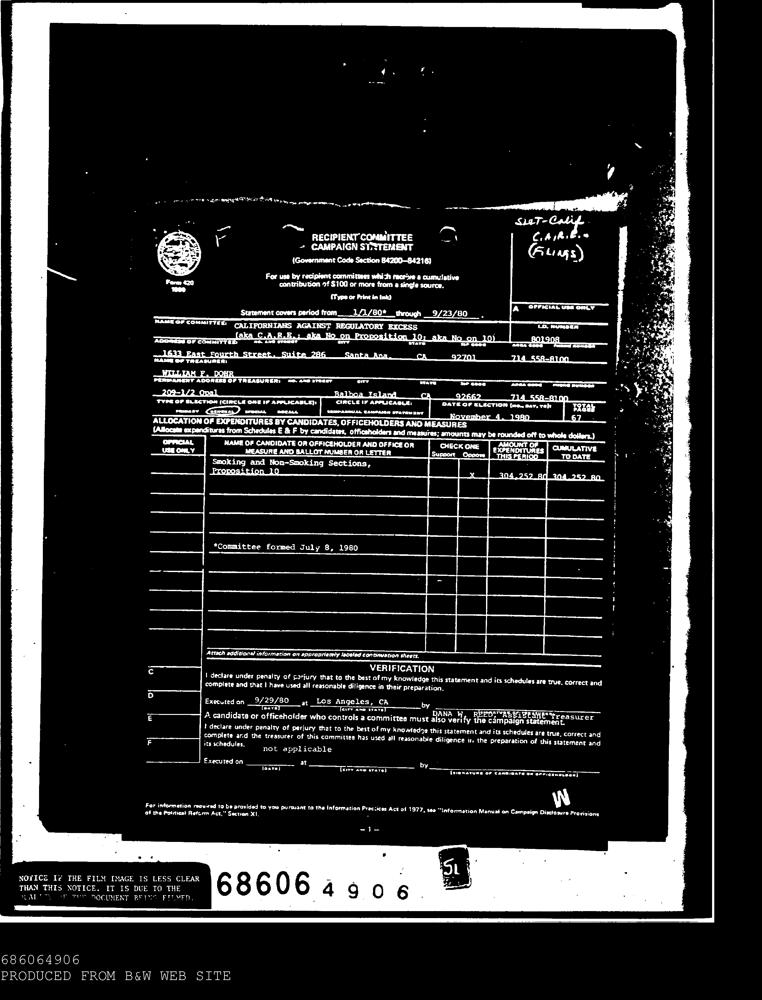

accuracy : 14.0


level  page_num  block_num  par_num  ...  width  height  conf  text
8       5         1          2        1  ...     48       8     0   Deg
9       5         1          2        1  ...     97      16    20    te
11      5         1          2        1  ...    113       9    17   err
15      5         1          3        1  ...    139       7    18  nee)
19      5         1          4        1  ...    193       7    17     a

[5 rows x 12 columns]

In [ ]:
# inverting image
inverted = cv2.bitwise_not(image)
cv2_imshow(inverted)

#performance check
image_df = pytesseract.image_to_data(inverted, output_type="data.frame")
temp = remove_spaces(image_df)
print("accuracy : {}".format(temp["conf"].sum() / len(temp)))
temp.head()

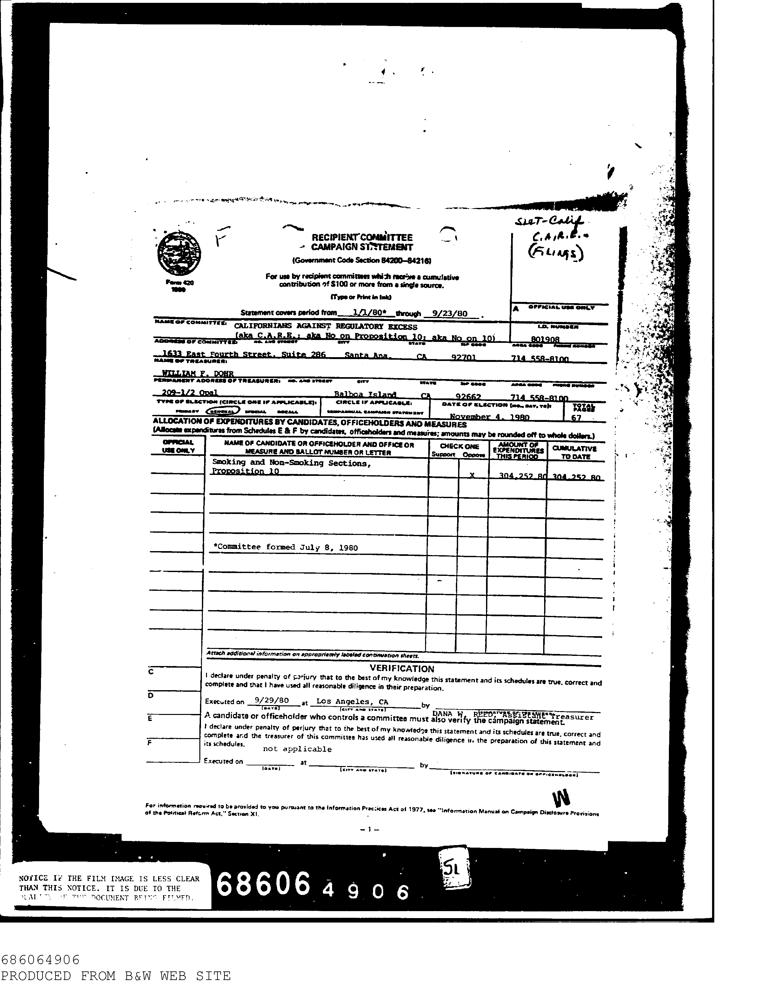

accuracy : 24.25


level  page_num  block_num  par_num  ...  width  height  conf              text
8       5         1          2        1  ...    145      16     0  Recmenrcomirrree
10      5         1          2        1  ...      5       3     0                 -
11      5         1          2        1  ...     47       7     0           Ekiaicn
12      5         1          2        1  ...     53       9     0          SPreonen
16      5         1          3        1  ...     43       7    34             (omit

[5 rows x 12 columns]

In [ ]:
# binarisation

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

#performance check
image_df = pytesseract.image_to_data(gray, output_type="data.frame")
temp = remove_spaces(image_df)
print("accuracy : {}".format(temp["conf"].sum() / len(temp)))
temp.head()

In [ ]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.GaussianBlur(image, (1, 1), cv2.BORDER_DEFAULT)
    return (image)

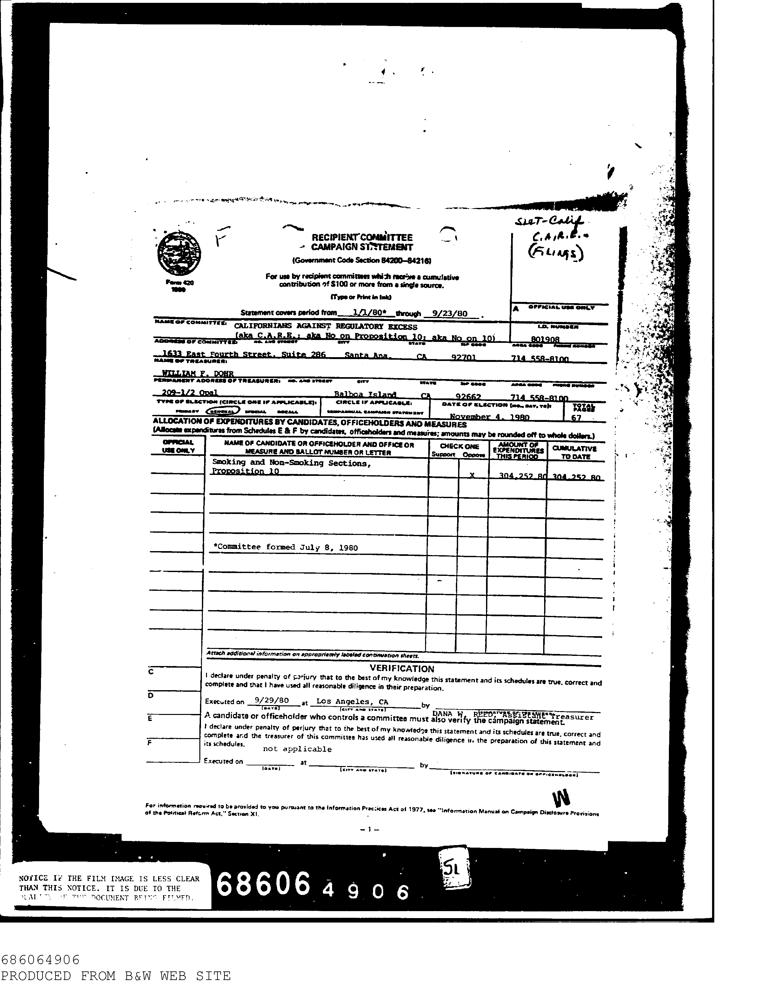

accuracy : 24.25


level  page_num  block_num  par_num  ...  width  height  conf              text
8       5         1          2        1  ...    145      16     0  Recmenrcomirrree
10      5         1          2        1  ...      5       3     0                 -
11      5         1          2        1  ...     47       7     0           Ekiaicn
12      5         1          2        1  ...     53       9     0          SPreonen
16      5         1          3        1  ...     43       7    34             (omit

[5 rows x 12 columns]

In [ ]:
no_noise = noise_removal(gray)

cv2_imshow(no_noise)

#performance check
image_df = pytesseract.image_to_data(no_noise, output_type="data.frame")
temp = remove_spaces(image_df)
print("accuracy : {}".format(temp["conf"].sum() / len(temp)))
temp.head()

In [ ]:
def deskewing(img):

  img_edges = cv2.Canny(img, 100, 100, apertureSize=3)
  lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)
  angles = []
  if lines is not None:
      for x1, y1, x2, y2 in lines[0]:
          cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
          angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
          angles.append(angle)
      median_angle = np.median(angles)
      if (median_angle != 0) :
          img = ndimage.rotate(img, median_angle)
  return img


In [ ]:
def rem_low_conf(dataframe):
  return dataframe[dataframe["conf"] >= 75]

In [ ]:
def Pre_processing(img, df):
  ret,thresh1 = cv2.threshold(img,110,255,cv2.THRESH_BINARY)

  result_mean = df["conf"].mean()
  blur = cv2.bilateralFilter(thresh1,9,100,100)
  result_after_preproc = pytesseract.image_to_data(blur, output_type='data.frame')
  result_after_preproc = result_after_preproc[result_after_preproc.conf > 75]
  result_after_preproc_mean= result_after_preproc["conf"].mean()
  if (result_mean < result_after_preproc_mean):
      df = result_after_preproc
  return df

In [ ]:
import pandas as pd

data_frame = pd.DataFrame(columns=["text", "Doc_type"])

data_frame

Empty DataFrame
Columns: [text, Doc_type]
Index: []

In [ ]:
count = 0

for number in range(1, 6):
  for i in range(len(list_files[number][2])):
    path = str(list_files[number][0]) + "/" + str(list_files[number][2][i])

    im = Image.open(path)
    img=np.asarray(im)
    # #to convert into gray scale
    # img=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #for tilted images
    img_edges = cv2.Canny(img, 100, 100, apertureSize=3)
    lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)
    angles = []
    if lines is not None:
        for x1, y1, x2, y2 in lines[0]:
            cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
            angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
            angles.append(angle)
        median_angle = np.median(angles)
        if (median_angle != 0) :
            img = ndimage.rotate(img, median_angle)
    #to read text using tesseract
    result=pytesseract.image_to_data(img, output_type='data.frame')
    #to remove words with less confidence
    result = result[result.conf > 75]
    result_mean = result["conf"].mean()
    #to apply image preprocessing
    ret,thresh1 = cv2.threshold(img,110,255,cv2.THRESH_BINARY)
    blur = cv2.bilateralFilter(thresh1,9,100,100)
    result_after_preproc = pytesseract.image_to_data(blur, output_type='data.frame')
    result_after_preproc = result_after_preproc[result_after_preproc.conf > 75]
    result_after_preproc_mean= result_after_preproc["conf"].mean()
    if (result_mean<result_after_preproc_mean):
        result=result_after_preproc
    #to keep track of progress
    #to extract file name and set it as class
    num = 0
    for char in list_files[number][0][::-1]:
      if char == "/":
        break
      else:
        num += 1

    cal = len(list_files[number][0]) - num 
    folder = list_files[number][0][cal:]
    result = remove_spaces(result)
    #joining words to form sentences
    text = ""
    for word in result["text"]:
      text = text + " " + word
    text
    data_frame = data_frame.append({"text" : text, "Doc_type" : folder}, ignore_index=True)

    count += 1
    print("path:{}, folder:{} count:{}".format(path, folder, count))

path:/content/docs-sm/resume/0000153376.jpg, folder:resume count:1
path:/content/docs-sm/resume/0000278356.jpg, folder:resume count:2
path:/content/docs-sm/resume/0000638493.jpg, folder:resume count:3
path:/content/docs-sm/resume/0000638593.jpg, folder:resume count:4
path:/content/docs-sm/resume/0000643018.jpg, folder:resume count:5
path:/content/docs-sm/resume/0000790115.jpg, folder:resume count:6
path:/content/docs-sm/resume/0001058950.jpg, folder:resume count:7
path:/content/docs-sm/resume/00071736_00071737.jpg, folder:resume count:8
path:/content/docs-sm/resume/01183662.jpg, folder:resume count:9
path:/content/docs-sm/resume/03535417_03535424.jpg, folder:resume count:10
path:/content/docs-sm/resume/03639630_9646.jpg, folder:resume count:11
path:/content/docs-sm/resume/10036927_10036948.jpg, folder:resume count:12
path:/content/docs-sm/resume/1005067506.jpg, folder:resume count:13
path:/content/docs-sm/resume/10065451.jpg, folder:resume count:14
path:/content/docs-sm/resume/10106132

In [ ]:
data_frame.to_csv("extracted_text.csv")

In [ ]:
data_frame

text Doc_type
0      George A. Santisteban, Ph. Personal George An...   resume
1      Jester R. Vital Statistics: 1. September 8, 1...   resume
2      time he been engaged in a of projects dealing...   resume
3      THOMAS A. Research Economist, Agricultural an...   resume
4      Curriculum Vitae Linda G. Russek, Ph.D. Date ...   resume
...                                                 ...      ...
1564   THE TOBACCO INSTITUTE STREET. NORTHWEST SAMUE...   letter
1565   ' Gary Community School Corporation of Gary, ...   letter
1566   THE TOBACCO INSTITUTE 1875 DC 20008 202/487-4...   letter
1567                          TRADE TIMN 460364 0543328   letter
1568   WILSON W. WRIGHT FLORIDA October 20, 1982 Mr....   letter

[1569 rows x 2 columns]

In [ ]:
data_frame["text"].replace(r"^\s*$", np.nan, regex=True, inplace=True)

new_df = data_frame.copy()
print(new_df.isnull().sum())
new_df.dropna(inplace=True)
print(new_df.isnull().sum())
new_df

text        139
Doc_type      0
dtype: int64
text        0
Doc_type    0
dtype: int64


text Doc_type
0      George A. Santisteban, Ph. Personal George An...   resume
1      Jester R. Vital Statistics: 1. September 8, 1...   resume
2      time he been engaged in a of projects dealing...   resume
3      THOMAS A. Research Economist, Agricultural an...   resume
4      Curriculum Vitae Linda G. Russek, Ph.D. Date ...   resume
...                                                 ...      ...
1564   THE TOBACCO INSTITUTE STREET. NORTHWEST SAMUE...   letter
1565   ' Gary Community School Corporation of Gary, ...   letter
1566   THE TOBACCO INSTITUTE 1875 DC 20008 202/487-4...   letter
1567                          TRADE TIMN 460364 0543328   letter
1568   WILSON W. WRIGHT FLORIDA October 20, 1982 Mr....   letter

[1430 rows x 2 columns]

In [ ]:
new_df.head()

text Doc_type
0   George A. Santisteban, Ph. Personal George An...   resume
1   Jester R. Vital Statistics: 1. September 8, 1...   resume
2   time he been engaged in a of projects dealing...   resume
3   THOMAS A. Research Economist, Agricultural an...   resume
4   Curriculum Vitae Linda G. Russek, Ph.D. Date ...   resume

# NLP




---




In [ ]:
! python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy
from spacy import displacy 
from  spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_sm
import string
import nltk

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
stopwords = list(STOP_WORDS)
print(stopwords[:100])

['seems', 'beyond', 'through', 'of', 'empty', 'anyone', 'sometimes', 'my', 'are', 'make', 'whereupon', 'various', 'really', 'top', "'m", 'quite', 'once', 'elsewhere', 'n’t', 'first', 'out', 'somehow', 'do', 'say', 'off', 'two', 'under', 'former', 'its', '‘re', 'yourselves', 'yet', 'thereby', 'ours', 'also', 'nor', 'therefore', 'about', 'used', 'which', 'itself', 'behind', 'meanwhile', '’m', 'back', 'for', 'or', 'further', 'will', 'throughout', 'have', 'nothing', 'being', 'anywhere', 'regarding', 'yourself', 'never', 'name', 'now', 'least', 'around', 'wherein', 'a', 'herself', 'too', 'indeed', 'has', '‘d', 'who', 'since', 'unless', 'latter', 'yours', 'ten', 'whom', 'would', 'his', 'ca', 'full', 'hereby', 'sometime', 'again', 'neither', 'might', 'others', 'had', 'there', 'most', 'keep', 'among', 'though', 'did', 'twenty', 'whither', 'done', 'their', 'with', 'herein', 'become', 'should']


In [ ]:
# Remove / and - from punctuations for dates
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Function to tokenise the text
def tokeniser(sentence):
    
    # Process the text
    doc = nlp(sentence)

    # Rule 1
    # Convert tokens to lemma form for all except '-PRON-'
    # Remember (from SpaCy introduction) : Tokens like I, my, me were represented as '-PRON-' by lemma attribute
    tokens = [ token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in doc ]

    # Rule 2
    # Remove stop words and punctuation
    tokens = [ token for token in tokens if token not in stopwords and token not in punctuations ]
    
    return tokens

In [ ]:
tfvectorizer = TfidfVectorizer(tokenizer = tokeniser)

In [ ]:
new_df.head()

text Doc_type
0   George A. Santisteban, Ph. Personal George An...   resume
1   Jester R. Vital Statistics: 1. September 8, 1...   resume
2   time he been engaged in a of projects dealing...   resume
3   THOMAS A. Research Economist, Agricultural an...   resume
4   Curriculum Vitae Linda G. Russek, Ph.D. Date ...   resume

In [ ]:
new_df.isnull().sum()

text        0
Doc_type    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( new_df['text'], new_df['Doc_type'], 
                                                    test_size = 0.2, random_state = 678)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifier_NB = MultinomialNB()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Create the  pipeline to clean, tokenize, vectorize, and classify using"Count Vectorizor"
# Multiple models can be added to the Pipeline object to be executed in sequence.
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer), 
                         ('classifier', classifier_NB) ] )

In [ ]:
model_pipe_NB.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokeniser at 0x7f4fc3764950>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False

In [ ]:
import pickle

In [ ]:
filename = 'NB_model_5cat_data.sav'
pickle.dump(model_pipe_NB, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
preds = model_pipe_NB.predict(X_test)

In [ ]:
X_test[:10]

1205     S HAMMONS S. SCHWALM FROM: J. CAMPBELL /#1610...
1358     2721 Davis Chapel Road Oxford, NC 27565 June ...
1218     DATE ROUTED: 4/24/89 Contract CONTRACT SUBJEC...
366      CELL C Elkins Park, Pa. PRODUCT TEST October,...
1128     ot certify of publication) is not directed pr...
1037     ITEM(S) RECORDS MANAGEMENT 120 PARK FLOOR DAT...
1081     : SHOOK, HARDY & FAX ‘One Kansas City Place F...
1486     Company January 17, 1995 Mr, Pat Manna Direct...
1130     I certify (title of publication) is not direc...
766      PHILIP. USA CHER 10/25/96 L DUE: Platt Campai...
Name: text, dtype: object

In [ ]:
y_test[:10]

1205             form
1358           letter
1218             form
366     questionnaire
1128             form
1037             form
1081             form
1486           letter
1130             form
766           invoice
Name: Doc_type, dtype: object

In [ ]:
# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(X_test, y_test))

Train Accuracy:  0.9571678321678322
Test Accuracy:  0.8006993006993007
